Rapport de Préparation du Projet Data sur vente en magasin
Introduction :
Ce projet a pour objectif d'analyser les données de ventes de trois produits, Pull, Claquette et Pantalon, sur une période de trois jours en janvier 2024. 
L'analyse vise à identifier les tendances de vente, évaluer la performance des produits, et formuler des recommandations pour optimiser les stratégies de stock et de marketing. 
Les résultats de cette analyse seront présentés de manière concise et précise pour permettre une prise de décision éclairée.


1. Obtenir et Charger les Données
Les données de ventes ont été chargées à partir d'un fichier CSV nommé sales_data.csv.
Le fichier contient les informations suivantes :<br> la date de vente, le nom du produit, la quantité vendue, et le prix unitaire.
Les étapes suivantes ont été réalisées pour préparer les données pour l'analyse :

In [22]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from typing import Any


# Charger les données
df: pd.DataFrame = pd.read_csv('sales_data.csv')

Chargement des données : Le DataFrame Pandas a été utilisé pour charger les données du fichier CSV. 
Les autres bibliotheque necessaires au projet seront aussi importé

2. Exploration des Données (EDA)
Une exploration préliminaire des données a été effectuée pour mieux comprendre la distribution et les caractéristiques des données :

In [23]:
# Exploration des Données (EDA)
def display_basic_info(data: pd.DataFrame) -> None:
    """Affiche les premières lignes et des informations générales sur le DataFrame."""
    print(data.head())
    print(data.info())
    print(data.describe())

display_basic_info(df)

         date    product  quantity  price
0  2024-01-01       pull        10   25.0
1  2024-01-01  claquette         5   15.0
2  2024-01-02       pull         7   25.0
3  2024-01-02   pantalon        12   30.0
4  2024-01-03  claquette         8   15.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      6 non-null      object 
 1   product   6 non-null      object 
 2   quantity  6 non-null      int64  
 3   price     6 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 324.0+ bytes
None
        quantity      price
count   6.000000   6.000000
mean    8.000000  23.333333
std     2.607681   6.831301
min     5.000000  15.000000
25%     6.250000  17.500000
50%     7.500000  25.000000
75%     9.500000  28.750000
max    12.000000  30.000000


Statistiques descriptives : Un résumé statistique des colonnes quantitatives a été généré pour obtenir une vue d'ensemble des données.
Vérification des types de données : Une inspection des types de données a été effectuée pour garantir leur adéquation pour l'analyse.

3. Nettoyage des Données
Le nettoyage des données a été réalisé pour assurer l'intégrité des informations utilisées pour l'analyse :

In [24]:
# Nettoyer les Données 
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['product'] = df['product'].astype('string')

def clean_data(data: pd.DataFrame) -> pd.DataFrame:
    """Nettoie les données en gérant les valeurs manquantes et les doublons, et en standardisant les colonnes."""
    print("\nValeurs manquantes par colonne :")
    print(data.isnull().sum())

    print("\nNombre de doublons :")
    print(data.duplicated().sum())

    print("\nTypes de données :")
    print(data.dtypes)

    print("\nValeurs manquantes après conversion de la date :")
    print(data['date'].isnull().sum())

    print("\nValeurs aberrantes potentielles pour 'quantity' :")
    print(data['quantity'].describe())

    print("\nValeurs aberrantes potentielles pour 'price' :")
    print(data['price'].describe())

    data['product'] = data['product'].str.strip().str.lower()
    data.to_csv('cleaned_sales_data.csv', index=False)
    return data

df = clean_data(df)


Valeurs manquantes par colonne :
date        0
product     0
quantity    0
price       0
dtype: int64

Nombre de doublons :
0

Types de données :
date        datetime64[ns]
product     string[python]
quantity             int64
price              float64
dtype: object

Valeurs manquantes après conversion de la date :
0

Valeurs aberrantes potentielles pour 'quantity' :
count     6.000000
mean      8.000000
std       2.607681
min       5.000000
25%       6.250000
50%       7.500000
75%       9.500000
max      12.000000
Name: quantity, dtype: float64

Valeurs aberrantes potentielles pour 'price' :
count     6.000000
mean     23.333333
std       6.831301
min      15.000000
25%      17.500000
50%      25.000000
75%      28.750000
max      30.000000
Name: price, dtype: float64


Correction des types de données : La colonne date a été convertie en format datetime pour faciliter les analyses temporelles. Les noms des produits ont été standardisés en minuscules et sans espaces supplémentaires.<br>
Gestion des valeurs manquantes : Les valeurs manquantes ont été identifiées, et leur impact sur l'analyse a été évalué.
Vérification des doublons : Les doublons ont été recherchés et leur nombre a été reporté.<br>
Identification des valeurs aberrantes : Des analyses statistiques ont été effectuées sur les colonnes quantity et price pour identifier les valeurs aberrantes potentielles.


4. Analyse des Données
L'analyse des données s'est concentrée sur la performance des ventes et les tendances observées sur la période étudiée :

In [25]:
# Analyser les Données
df['total_sales'] = df['quantity'] * df['price']

total_sales_by_product: pd.Series = df.groupby('product')['total_sales'].sum()
print(total_sales_by_product)

total_quantity_by_product: pd.Series = df.groupby('product')['quantity'].sum()
print(total_quantity_by_product)

total_sales_by_date: pd.Series = df.groupby('date')['total_sales'].sum()
print(total_sales_by_date)

product
claquette    195.0
pantalon     540.0
pull         425.0
Name: total_sales, dtype: float64
product
claquette    13
pantalon     18
pull         17
Name: quantity, dtype: int64
date
2024-01-01    325.0
2024-01-02    535.0
2024-01-03    300.0
Name: total_sales, dtype: float64


Calcul des ventes totales : Une colonne total_sales a été ajoutée pour représenter le total des ventes par ligne de données. Les ventes totales par produit et par jour ont été calculées.<br>
Quantités vendues : Le total des quantités vendues pour chaque produit a été calculé.

#5. Visualisation des Données
Pour faciliter l'interprétation des résultats, des visualisations ont été créées :

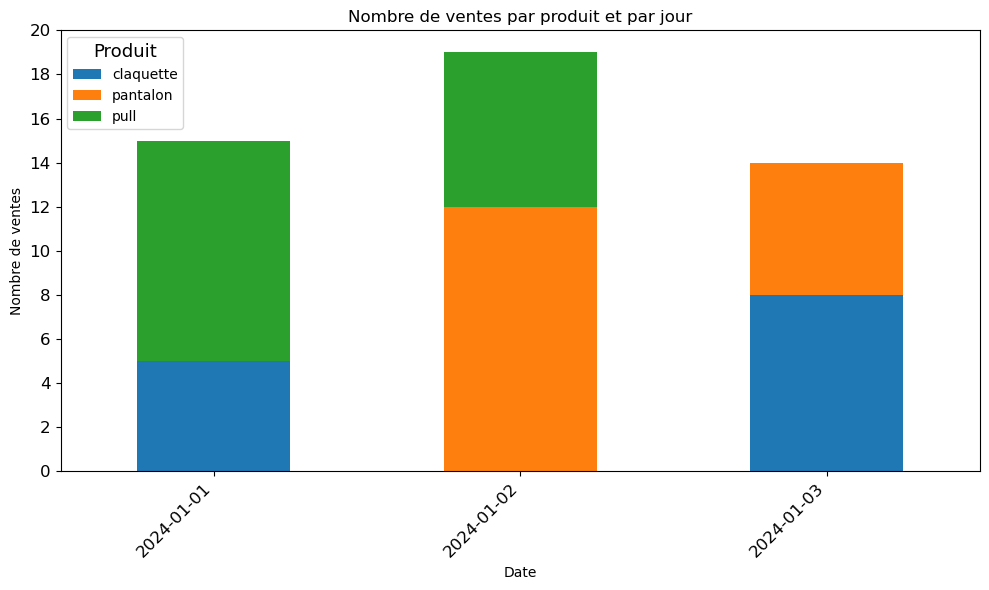

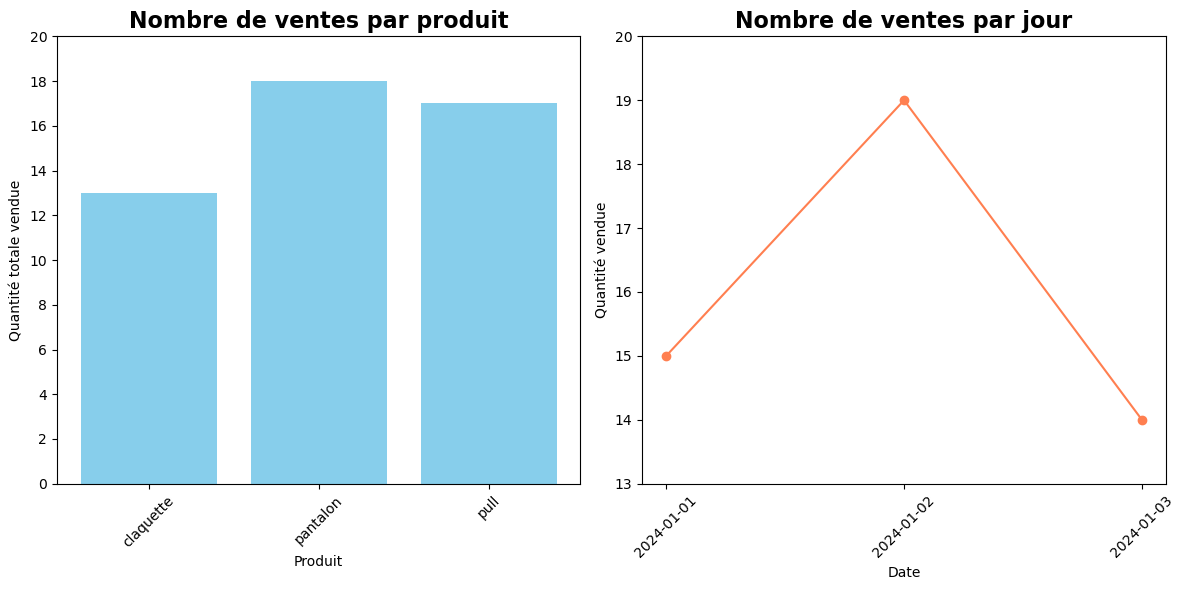

In [26]:
# Visualisation des Données
grouped_df: pd.DataFrame = df.groupby(['date', 'product'])['quantity'].sum().unstack()

# Création du barplot empilé
grouped_df.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%2024-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.title('Nombre de ventes par produit et par jour')
plt.xlabel('Date')
plt.ylabel('Nombre de ventes')
plt.legend(title='Produit')
plt.ylim(0, 20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(range(0, 21, 2), fontsize=12)
plt.legend(title='Produit', fontsize=10, title_fontsize='13', loc='upper left')
plt.tight_layout()
plt.show()


# Analyse Approfondie (Visualisation)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Graphique de ventes par produit
product_sales: pd.Series = df.groupby('product')['quantity'].sum()
axs[0].bar(product_sales.index, product_sales.values, color='skyblue')
axs[0].set_title('Nombre de ventes par produit', fontsize=16, fontweight='bold')
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_ylim(0, 20)
axs[0].set_yticks(range(0, 21, 2))
axs[0].set_xlabel('Produit')
axs[0].set_ylabel('Quantité totale vendue')

# Graphique de ventes journalier
daily_sales: pd.Series = df.groupby('date')['quantity'].sum()
axs[1].plot(daily_sales.index, daily_sales.values, marker="o", color="coral")
axs[1].set_title("Nombre de ventes par jour", fontsize=16, fontweight='bold')
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_ylim(daily_sales.min() - 1, daily_sales.max() + 1)
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Quantité vendue')
axs[1].set_xticks(daily_sales.index)

plt.tight_layout()
plt.show()


Insights:
1. Performance des Produits<br>
Pull : Produit vendu, avec 17 unités (34% du total).<br>
Pantalon : Produit ayant le plus grand nombre d'unités vendues, avec 18 unités (36% du total).<br>
Claquette : Produit avec des ventes plus modérées, 13 unités (26% du total).

2. Tendances Quotidiennes<br>
1 janvier 2024 : Activité modérée avec 15 unités vendues (30% du total).<br>
2 janvier 2024 : Augmentation des ventes avec 19 unités (38% du total).<br>
3 janvier 2024 : Légère diminution des ventes avec 14 unités (28% du total).

Recommandations :<br>
Stockage : Augmenter les stocks des Pantalons et maintenir ceux des Pull.<br>
Stratégie de Prix : Réévaluer le prix des Claquette pour stimuler les ventes.<br>
Collecte de Données : Étendre la période d'analyse pour des insights plus robustes.

Conclusion:

L'analyse réalisée, bien que limitée à une courte période, a permis d'identifier des tendances clés et de formuler des recommandations actionnables. 
Il est essentiel de continuer à collecter et analyser les données pour ajuster les stratégies et maximiser les opportunités de vente. 
Ce rapport offre une base solide pour la prise de décision et la planification stratégique à court terme.